In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Pressure Drawdown Testing
### (L.P. Dake - Exercise 7.2 page 162 )

A well is tested by producing it at a constant rate of 1500 stb/d for a period of 100 hours. It is suspected, from seismic and geological evidence, that the well is draining an isolated reservoir block which has approximately a 2:1 rectangular geometrical shape and the extended drawdown test is intended to confirm this. The reservoir data and flowing bottom hole pressures recorded during the test are detailed below:

h = 20 ft, c = 15 × 10-6 /psi,
rw = .33 ft, μo = 1 cp,
φ = .18, Bo = 1.20 rb/stb,

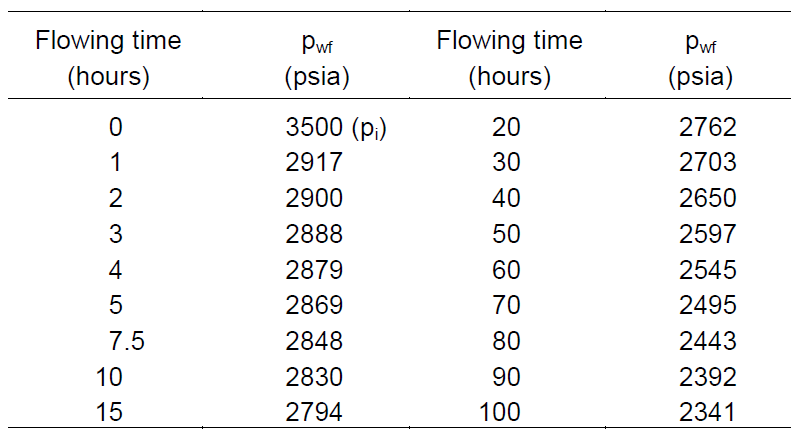


1) Calculate the effective permeability and skin factor of the well.

2) Make an estimate of the area being drained by the well and the Dietz shape factor.

In [2]:
# Resevoir Properties
q = 1500 #stb/d
tf = 100 #hrs
Pi = 3500 #psi
h = 20 #ft
c = 15 * 10**-6 #/psi
rw = .33 #ft
mu = 1 #cp
phi = .18
Bo = 1.20 #rb/stb

In [3]:
# Recorded bottomhole pressures
t= np.array([1,2,3,4,5,7.5,10,15,20,30,40,50,60,70,80,90,100])
Pwf = np.array([2917,2900,2888,2879,2869,2848,2830,2794,2762,2703,2650,2597,2545,2495,2443,2392,2341])
df = pd.DataFrame({'Flowing time, hrs (t)':t, 'Pwf, psi':Pwf})
df

,"Flowing time, hrs (t)","Pwf, psi"
0,1.0,2917
1,2.0,2900
2,3.0,2888
3,4.0,2879
4,5.0,2869
5,7.5,2848
6,10.0,2830
7,15.0,2794
8,20.0,2762
9,30.0,2703


#### 1.) k and S can be estimated from early transient region using equation for ei < .01:

$p_{wf}=p_i-\frac{qB_o\mu}{4\pi kh}(ln\frac{4kt}{\gamma \phi \mu cr_w^2}+2S)$ in Darcy Units

$p_{wf}=p_i-\frac{162.6qB_o\mu}{kh}(log_{10}\frac{kt}{\phi \mu cr_w^2}-3.23+.869S)$ in Field Units

If m is the slope in $P_{wf}$ vs t semi-log plot and $P_{wf(1 hr)}$ is the intercept (in Field Units),

$k=\frac{162.6qB_o\mu}{mh}$

$S=1.151(\frac{p_i-p_{wf(1 hr)}}{m}-log_{10}\frac{k}{\phi \mu cr_w^2}+3.23)$

 


#### 2.) A and $C_A$ can be estimated from later period using equations:

$\frac{dp}{dt}=-\frac{qB_o}{cAh\phi} (atm/s)$ in Darcy Units

$\frac{dp}{dt}=-\frac{.2339qB_o}{cAh\phi} (psi/hr)$ in Field Units

$p_i-p_{wf}=\frac{qB_o\mu}{4\pi kh}(\frac{1}{2}ln\frac{4A}{\gamma C_Ar_w^2}+2\pi\frac{kt}{\phi \mu cA}+2S)$ in Darcy Units

$p_i-p_o=m(log_{10}\frac{4A}{\gamma r_w^2}-log_{10}C_A+.869S)$ in Field Units

In [4]:
# optmizing the number of points that are to be taken for regression
r_square = []
for i in range(1,6):
    x = np.log10(t[:i])
    Pwf_ = Pwf[:i]
    slope, intercept, r_value, p_value, std_err = linregress(x, Pwf_)
    r_square.append(r_value)
r_square

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


[0.0, -1.0, -0.998708330563765, -0.9982702013334013, -0.994606979091829]

### In above array, considering till third element, 3 points is reasonable for regression. After this, Later Transient region starts.

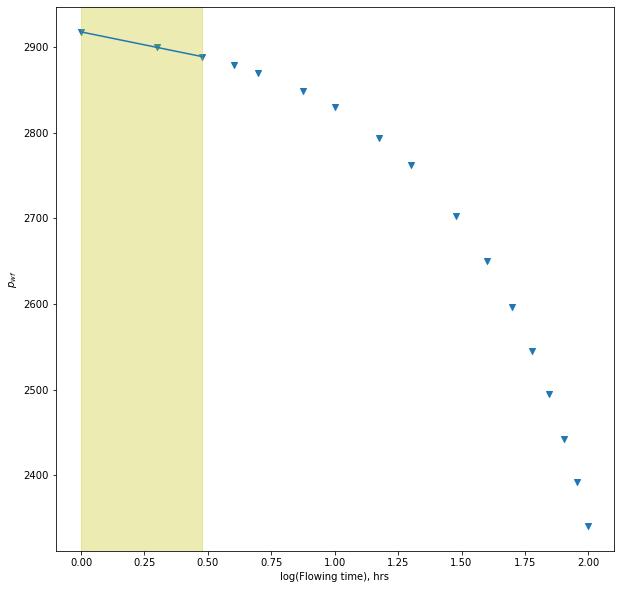

In [5]:
# Early Transient
plt.figure(figsize=(10,10))
plt.scatter(np.log10(t), Pwf, marker= 'v') #semilog plot
plt.xlabel('log(Flowing time), hrs')
plt.ylabel('$p_{wf}$')

x = np.log10(t[:3])
Pwf_ = Pwf[:3]
m, Pwf_1hr, r_value, p_value, std_err = linregress(x, Pwf_)
plt.plot(x, m*(x)+Pwf_1hr)
plt.axvspan(0,x[-1],alpha=0.3,color='y')
m=-m

In [6]:
m,Pwf_1hr

(60.31725580288526, 2917.311982674242)

In [7]:
k = 162.6*q*mu*Bo/m/h
k #md

242.6171384159686

In [8]:
S = 1.151*(((Pi-Pwf_1hr)/m)-np.log10(k/phi/mu/c/(rw**2))+3.23)
S #Skin


4.573909285172924

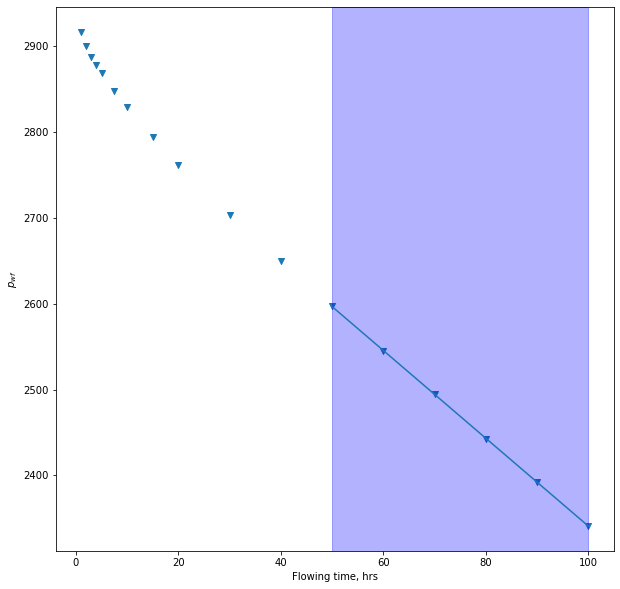

In [9]:
# Semi Steady State flow condition
plt.figure(figsize=(10,10))
plt.scatter(t, Pwf, marker= 'v')
plt.xlabel('Flowing time, hrs')
plt.ylabel('$p_{wf}$')

x = t[11:]
Pwf_ = Pwf[11:]
m2, Po, r_value, p_value, std_err = linregress(x, Pwf_)
plt.plot(x, m2*(x)+Po)
plt.axvspan(x[0],x[-1],alpha=0.3,color='b')

In [10]:
m2,Po

(-5.117142857142857, 2852.6190476190477)

In [11]:
A = -.2339*q*Bo/c/m2/h/phi
A/43560 #drainage area in acres

34.9778857215028

In [14]:
Ca = 10**(np.log10(4*A/1.781/(rw**2))+.869*S-(Pi-Po)/m)
Ca #Dietz Shape Factor

5.483346093526357

So, the estimated $C_A$ is approx equal to the suspected geometry as:

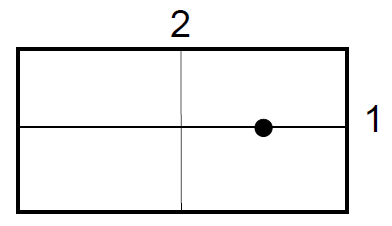